In [1]:
import warnings   
warnings.simplefilter("ignore") 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib notebook
import sys
sys.path.append('/Users/Serene/calour')
import calour as cl
import numpy as np
import pandas as pd
import calour.cahelper as cah
import calour.analysis

from scipy.stats import sem

In [ ]:
cl.set_log_level(40) # get rid of warnings in calour

In [2]:
dibd = cl.read_taxa('data/dibd.biom','data/dibd.map.txt', sparse=False, filter_orig_reads=1000)

In [3]:
dibd.sample_metadata.disease_stat.value_counts()

healthy                89
IBD                    69
acute hem. diarrhea    14
Name: disease_stat, dtype: int64

In [4]:
np.random.seed(31)
dibd_sub1 = dibd.filter_min_abundance(5)

## check p-values

In [5]:
def ds_gap(pvals, cdf):
    gap = []
    for i in range(len(pvals)):
        dist = pvals[i] - cdf[i]
        if dist > 0:
            gap.append(dist)
        if dist <= 0:
            gap.append(0)
    norm = np.sum(gap)
    return norm

In [6]:
xx = dibd_sub1.diff_abundance('disease_stat','IBD','healthy', alpha = 1, fdr_method='dsfdr')

In [7]:
yy = xx.feature_metadata['_calour_diff_abundance_pval']

<IPython.core.display.Javascript object>


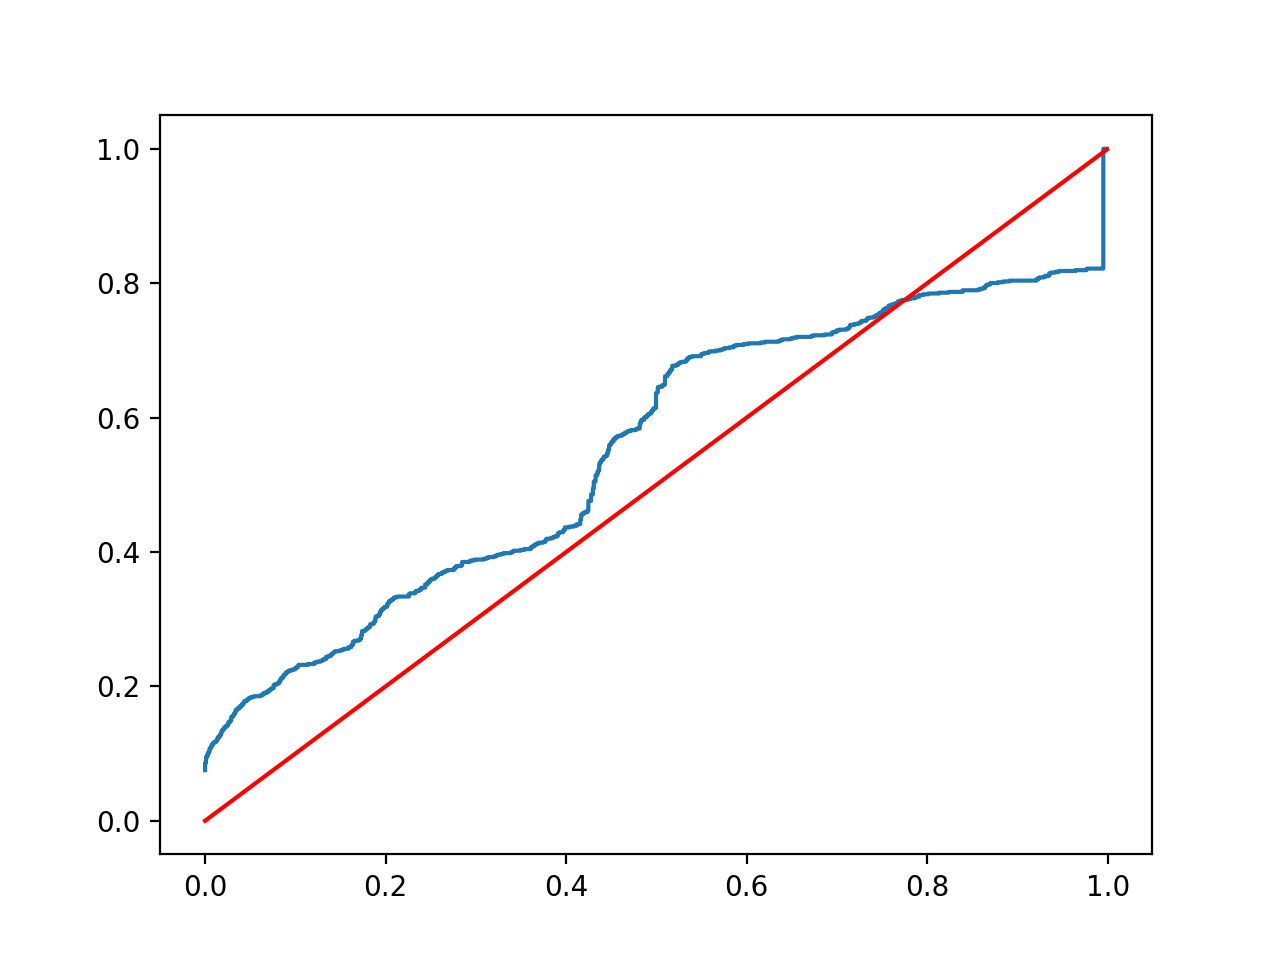

3.23065092802


In [8]:
from statsmodels.distributions.empirical_distribution import ECDF
from numpy import linalg as LA

sample = yy  
ecdf = ECDF(sample)

x = np.sort(sample)
y = ecdf(x)
plt.figure()
plt.step(x, y)
plt.plot(x, x, color = 'red')

gap = []
for i in range(len(x)):
    dist = x[i] - y[i]
    if dist > 0:
        gap.append(dist)
    if dist <= 0:
        gap.append(0)
norm = np.sum(gap)
print(norm)

## subsamples

In [9]:
np.random.seed(31)
ds2 = []
bh2 = []
fbh2 = []

for i in range(100):
    dibd_sub2 = dibd_sub1.downsample('disease_stat', num_keep=60)
    ds = dibd_sub2.diff_abundance('disease_stat','IBD','healthy',fdr_method='dsfdr')
    bh = dibd_sub2.diff_abundance('disease_stat','IBD','healthy',fdr_method='bhfdr')
    fbh = dibd_sub2.diff_abundance('disease_stat','IBD','healthy',fdr_method='filterBH')
    
    if ds is None:
        sig_ds = 0
    else:
        sig_ds = len(ds.feature_metadata.index)
    if bh is None:
        sig_bh = 0
    else:
        sig_bh = len(bh.feature_metadata.index)
    if fbh is None:
        sig_fbh = 0
    else:
        sig_fbh = len(fbh.feature_metadata.index)
        
    ds2.append(sig_ds)
    bh2.append(sig_bh)
    fbh2.append(sig_fbh)
    
DS2 = np.mean(ds2)
BH2 = np.mean(bh2)
FBH2 = np.mean(fbh2)
err_DS2 = sem(ds2)  # unbiased standard error
err_BH2 = sem(bh2)
err_FBH2 = sem(fbh2)

print(DS2, BH2, FBH2)
print(err_DS2, err_BH2, err_FBH2)

135.78 91.1 130.03
1.88725550293 1.6439359028 1.74960053161


In [10]:
np.random.seed(31)
ds3 = []
bh3 = []
fbh3 = []

for i in range(100):
    dibd_sub3 = dibd_sub1.downsample('disease_stat', num_keep=50)
    ds = dibd_sub3.diff_abundance('disease_stat','IBD','healthy',fdr_method='dsfdr')
    bh = dibd_sub3.diff_abundance('disease_stat','IBD','healthy',fdr_method='bhfdr')
    fbh = dibd_sub3.diff_abundance('disease_stat','IBD','healthy',fdr_method='filterBH')
    
    if ds is None:
        sig_ds = 0
    else:
        sig_ds = len(ds.feature_metadata.index)
    if bh is None:
        sig_bh = 0
    else:
        sig_bh = len(bh.feature_metadata.index)
    if fbh is None:
        sig_fbh = 0
    else:
        sig_fbh = len(fbh.feature_metadata.index)
        
    ds3.append(sig_ds)
    bh3.append(sig_bh)
    fbh3.append(sig_fbh)
    
DS3 = np.mean(ds3)
BH3 = np.mean(bh3)
FBH3 = np.mean(fbh3)
err_DS3 = sem(ds3)  # unbiased standard error
err_BH3 = sem(bh3)
err_FBH3 = sem(fbh3)

print(DS3, BH3, FBH3)
print(err_DS3, err_BH3, err_FBH3)

116.32 73.73 111.15
1.67915803818 1.26017915994 1.64103779679


In [11]:
np.random.seed(41)
ds4 = []
bh4 = []
fbh4 = []

for i in range(100):
    dibd_sub4 = dibd_sub1.downsample('disease_stat', num_keep=40)
    ds = dibd_sub4.diff_abundance('disease_stat','IBD','healthy',fdr_method='dsfdr')
    bh = dibd_sub4.diff_abundance('disease_stat','IBD','healthy',fdr_method='bhfdr')
    fbh = dibd_sub4.diff_abundance('disease_stat','IBD','healthy',fdr_method='filterBH')
    
    if ds is None:
        sig_ds = 0
    else:
        sig_ds = len(ds.feature_metadata.index)
    if bh is None:
        sig_bh = 0
    else:
        sig_bh = len(bh.feature_metadata.index)
    if fbh is None:
        sig_fbh = 0
    else:
        sig_fbh = len(fbh.feature_metadata.index)
        
    ds4.append(sig_ds)
    bh4.append(sig_bh)
    fbh4.append(sig_fbh)
    
DS4 = np.mean(ds4)
BH4 = np.mean(bh4)
FBH4 = np.mean(fbh4)
err_DS4 = sem(ds4)  # unbiased standard error
err_BH4 = sem(bh4)
err_FBH4 = sem(fbh4)

print(DS4, BH4, FBH4)
print(err_DS4, err_BH4, err_FBH4)

94.32 56.19 90.45
1.94639682646 1.53067589217 1.9275448874


In [12]:
np.random.seed(51)
ds5 = []
bh5 = []
fbh5 = []

for i in range(100):
    dibd_sub5 = dibd_sub1.downsample('disease_stat', num_keep=30)
    ds = dibd_sub5.diff_abundance('disease_stat','IBD','healthy',fdr_method='dsfdr')
    bh = dibd_sub5.diff_abundance('disease_stat','IBD','healthy',fdr_method='bhfdr')
    fbh = dibd_sub5.diff_abundance('disease_stat','IBD','healthy',fdr_method='filterBH')
    
    if ds is None:
        sig_ds = 0
    else:
        sig_ds = len(ds.feature_metadata.index)
    if bh is None:
        sig_bh = 0
    else:
        sig_bh = len(bh.feature_metadata.index)
    if fbh is None:
        sig_fbh = 0
    else:
        sig_fbh = len(fbh.feature_metadata.index)
        
    ds5.append(sig_ds)
    bh5.append(sig_bh)
    fbh5.append(sig_fbh)
    
DS5 = np.mean(ds5)
BH5 = np.mean(bh5)
FBH5 = np.mean(fbh5)
err_DS5 = sem(ds5)  # unbiased standard error
err_BH5 = sem(bh5)
err_FBH5 = sem(fbh5)

print(DS5, BH5, FBH5)
print(err_DS5, err_BH5, err_FBH5)

2017-03-13 21:10:42 WARNING no significant features found
73.44 37.4 68.98
1.74861099277 1.3774519002 1.59671253176


In [13]:
np.random.seed(61)
ds6 = []
bh6 = []
fbh6 = []

for i in range(100):
    dibd_sub6 = dibd_sub1.downsample('disease_stat', num_keep=20)
    ds = dibd_sub6.diff_abundance('disease_stat','IBD','healthy',fdr_method='dsfdr')
    bh = dibd_sub6.diff_abundance('disease_stat','IBD','healthy',fdr_method='bhfdr')
    fbh = dibd_sub6.diff_abundance('disease_stat','IBD','healthy',fdr_method='filterBH')
    
    if ds is None:
        sig_ds = 0
    else:
        sig_ds = len(ds.feature_metadata.index)
    if bh is None:
        sig_bh = 0
    else:
        sig_bh = len(bh.feature_metadata.index)
    if fbh is None:
        sig_fbh = 0
    else:
        sig_fbh = len(fbh.feature_metadata.index)
        
    ds6.append(sig_ds)
    bh6.append(sig_bh)
    fbh6.append(sig_fbh)
    
DS6 = np.mean(ds6)
BH6 = np.mean(bh6)
FBH6 = np.mean(fbh6)
err_DS6 = sem(ds6)  
err_BH6 = sem(bh6)
err_FBH6 = sem(fbh6)

print(DS6, BH6, FBH6)
print(err_DS6, err_BH6, err_FBH6)

2017-03-13 21:12:13 WARNING no significant features found
2017-03-13 21:12:15 WARNING no significant features found
2017-03-13 21:12:17 WARNING no significant features found
2017-03-13 21:12:21 WARNING no significant features found
2017-03-13 21:12:22 WARNING no significant features found
2017-03-13 21:12:24 WARNING no significant features found
2017-03-13 21:12:28 WARNING no significant features found
2017-03-13 21:12:36 WARNING no significant features found
2017-03-13 21:12:36 WARNING no significant features found
2017-03-13 21:12:41 WARNING no significant features found
2017-03-13 21:12:46 WARNING no significant features found
2017-03-13 21:12:58 WARNING no significant features found
2017-03-13 21:13:00 WARNING no significant features found
2017-03-13 21:13:01 WARNING no significant features found
2017-03-13 21:13:03 WARNING no significant features found
2017-03-13 21:13:05 WARNING no significant features found
2017-03-13 21:13:09 WARNING no significant features found
2017-03-13 21:

In [14]:
np.random.seed(71)
ds7 = []
bh7 = []
fbh7 = []

for i in range(100):
    dibd_sub7 = dibd_sub1.downsample('disease_stat', num_keep=10)
    ds = dibd_sub7.diff_abundance('disease_stat','IBD','healthy',fdr_method='dsfdr')
    bh = dibd_sub7.diff_abundance('disease_stat','IBD','healthy',fdr_method='bhfdr')
    fbh = dibd_sub7.diff_abundance('disease_stat','IBD','healthy',fdr_method='filterBH')
    
    if ds is None:
        sig_ds = 0
    else:
        sig_ds = len(ds.feature_metadata.index)
    if bh is None:
        sig_bh = 0
    else:
        sig_bh = len(bh.feature_metadata.index)
    if fbh is None:
        sig_fbh = 0
    else:
        sig_fbh = len(fbh.feature_metadata.index)
        
    ds7.append(sig_ds)
    bh7.append(sig_bh)
    fbh7.append(sig_fbh)
    
DS7 = np.mean(ds7)
BH7 = np.mean(bh7)
FBH7 = np.mean(fbh7)
err_DS7 = sem(ds7)  # unbiased standard error
err_BH7 = sem(bh7)
err_FBH7 = sem(fbh7)

print(DS7, BH7, FBH7)
print(err_DS7, err_BH7, err_FBH7)

2017-03-13 21:13:40 WARNING no significant features found
2017-03-13 21:13:41 WARNING no significant features found
2017-03-13 21:13:41 WARNING no significant features found
2017-03-13 21:13:41 WARNING no significant features found
2017-03-13 21:13:42 WARNING no significant features found
2017-03-13 21:13:42 WARNING no significant features found
2017-03-13 21:13:43 WARNING no significant features found
2017-03-13 21:13:44 WARNING no significant features found
2017-03-13 21:13:44 WARNING no significant features found
2017-03-13 21:13:45 WARNING no significant features found
2017-03-13 21:13:45 WARNING no significant features found
2017-03-13 21:13:46 WARNING no significant features found
2017-03-13 21:13:47 WARNING no significant features found
2017-03-13 21:13:49 WARNING no significant features found
2017-03-13 21:13:49 WARNING no significant features found
2017-03-13 21:13:49 WARNING no significant features found
2017-03-13 21:13:50 WARNING no significant features found
2017-03-13 21:

In [17]:
samples = np.arange(60, 0, -10)
otu_ds = np.array([DS2, DS3, DS4, DS5, DS6, DS7])
otu_bh = np.array([BH2, BH3, BH4, BH5, BH6, BH7])
otu_fbh = np.array([FBH2, FBH3, FBH4, FBH5, FBH6, FBH7])

err_ds = np.array([err_DS2, err_DS3, err_DS4, err_DS5, err_DS6, err_DS7])
err_bh = np.array([err_BH2, err_BH3, err_BH4, err_BH5, err_BH6, err_BH7])
err_fbh = np.array([err_FBH2, err_FBH3, err_FBH4, err_FBH5, FBH6, err_FBH7])

<IPython.core.display.Javascript object>


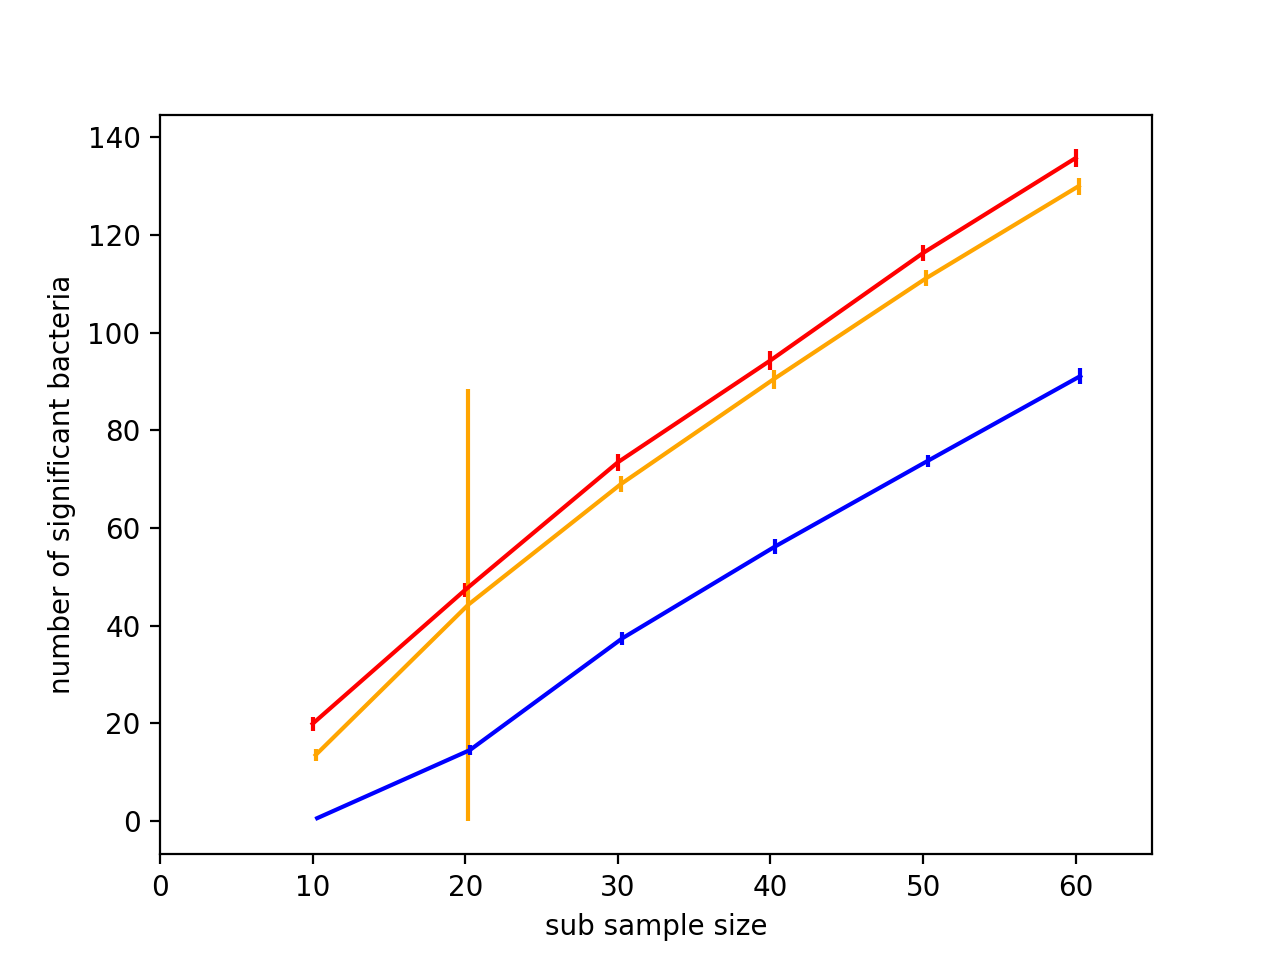

(0, 65)

In [22]:
import pylab 

plt.figure()
plt.errorbar(samples, otu_ds, yerr=err_ds, color = 'red')
plt.errorbar(samples+0.2, otu_fbh, yerr=err_fbh, color = 'orange')
plt.errorbar(samples+0.3, otu_bh, yerr=err_bh, color = 'blue')
plt.xlabel('sub sample size')
plt.ylabel('number of significant bacteria')

pylab.xlim([0, 65])

In [19]:
import pickle
with open("dibd_results.pkl", "wb") as f:
    pickle.dump((samples, otu_ds, otu_bh, otu_fbh, err_ds, err_bh, err_fbh), f)